# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import numpy as np
import os

#print(os.getcwd())

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

### 1.1 Basic Data Summary

We examined the structures of the datasets. For example, total numbers, shaps etc.

In [2]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples  =", n_test)
print("Image data shape            =", image_shape)
print("Single image data shape     =", X_train[1].shape)
print("Number of classes           =", n_classes)

Number of training examples = 39209
Number of testing examples  = 12630
Image data shape            = (39209, 32, 32, 3)
Single image data shape     = (32, 32, 3)
Number of classes           = 43


Noting that no validation dataset was prepared, we need to split it from the training examples. Suppose the splitting ration is 0.2, then the number of validation examples is around $40000*0.2=8000$. But $8000*0.001<30$, we cannot have an accuracy of 0.1% during validation process according to the rule of 30. 

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

### 1.2 Data Visualization

We performed two explorations for the training data.
- First, we displayed one image for each class.
- Second, we examined the balancy of the training data.

In total, we have 43 classes. They are [label, description] as follows:

[[0 'Speed limit (20km/h)']
 [1 'Speed limit (30km/h)']
 [2 'Speed limit (50km/h)']
 [3 'Speed limit (60km/h)']
 [4 'Speed limit (70km/h)']
 [5 'Speed limit (80km/h)']
 [6 'End of speed limit (80km/h)']
 [7 'Speed limit (100km/h)']
 [8 'Speed limit (120km/h)']
 [9 'No passing']
 [10 'No passing for vehicles over 3.5 metric tons']
 [11 'Right-of-way at the next intersection']
 [12 'Priority road']
 [13 'Yield']
 [14 'Stop']
 [15 'No vehicles']
 [16 'Vehicles over 3.5 metric tons prohibited']
 [17 'No entry']
 [18 'General caution']
 [19 'Dangerous curve to the left']
 [20 'Dangerous curve to the right']
 [21 'Double curve']
 [22 'Bumpy road']
 [23 'Slippery road']
 [24 'Road narrows on the right']
 [25 'Road work']
 [26 'Traffic signals']
 [27 'Pedestrians']
 [28 'Children crossing']
 [29 'Bicycles crossing']
 [30 'Beware of ice/snow']
 [31 'Wild animals crossing']
 [32 'End of all speed and passing limits']
 [33 '

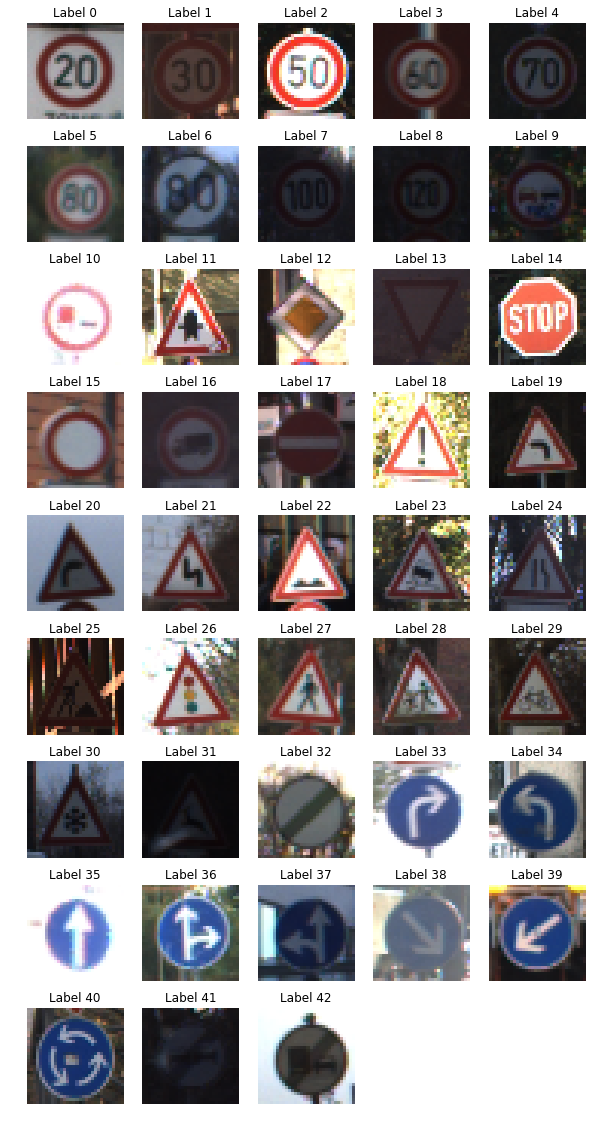

In [3]:
# We check all possible traffic signs here.
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# obtain features description
signNames = np.array(pd.read_csv('./signnames.csv'))

def show_all_labels(X, y):
    """
    Display a smaple image each traffic sgin class/label.
    :param X: image data
    :param y: label data
    Notes. the function used nonlocal variables signNames and n_calsses
    """
    num_classes = len(np.unique(y))
    column = 5
    row = num_classes//column + 1
    plt.figure(figsize=(10, 20))
    for i in range(num_classes):
        plt.subplot(row, column, i+1)
        position = np.where(y==signNames[i][0])[0][110]
        plt.imshow(X[position])
        plt.axis('off')
        plt.title('Label ' + str(i))
    plt.show()
print('In total, we have {} classes. They are [label, description] as follows:\n'.format(n_classes))
print(signNames)
print('\nFor corresponding images, refer to the following.')
show_all_labels(X_train, y_train)

By investigating these 43 different traffic signs, we find that the signs' colors are not important HERE. But their shapes matter. Moreover, for almost all examples, the contents near boundaries won't affect the meaning of these traffic signs. Namely, even though one changed around 2 to 4 pixels' contents near the boundary, human can still detect its meaning. We also note that if one rotate an image too much the meaning of this image would be changed. For example, Label 17 and Label 32.   

Next let's check the distribution of the training data.


Distribution of our Present Training Data:



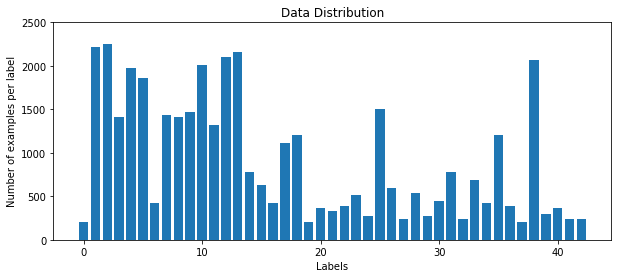

In [4]:
def data_distribution(y):
    """
    This function is used to check the distribution of data y.
    :param y: the set of labels (of training or testing data)
    No return but draw the distribution of y
    """
    plt.figure(figsize=(10, 4))
    num_per_label = np.bincount(y)
    num_labels = len(num_per_label)
    plt.bar(np.arange(num_labels), num_per_label, label='Inputs per label')
    plt.xlabel('Labels')
    plt.ylabel('Number of examples per label')
    plt.title('Data Distribution')
    plt.ylim((0,2500))
    plt.show()

print('\nDistribution of our Present Training Data:\n')
data_distribution(y_train)


It is not hard to find that the training data is inbalanced. The ratio of numbers of examples between the largest one and the smallest one is over 10:1, which can lower down the credibility of the final model. For example, even if the prediction of one model on first class (label 0) is totally wrong which is unacceptable, its accuarcy still can possibly achieve

$$1 - \frac{\text{number label-0 training examples}*2}{\text{total number of training examples}} = 1 - \frac{210*2}{39209} = 0.989.$$

### 1.3 Data Preprocessing 

**1.3.1. Grayscale**

Since converting traffic sign images to graysclae will reduce the amount of future computation while still keep their information, cv2.cvtColor(src, cv2.COLOR_RGB2GRAY) is used on training and testing data.

**1.3.2. Data Balancing**

Gaussian bluring, adding noise to boundaries, random rotation, enhancing contrast and random scaling will be used in data balancing. 

The idea is to introduce noises to exist data while guarantee the produced images still convey basic information. We only add noise to boundaries, aiming to force the model focus on the middle part of images. We use random but small rotations, aiming to mimic tilt of a traffic sign. We use gaussian bluring, aiming to increase the difficulty of information abstraction. On the other side, we taking this measure trying to increase the model's accuracy.

**1.3.3. Normalization**

The grayscaled test data and balanced training data will be normalized to the range of [0.1, 0.9] for the sake of computational efficiency.

**1.3.4. Splitting** 

Split obtained training data into a new training data and a validation data. The model will be build and trained based on the sets here.

In [5]:
# Grayscale
import cv2

X_train_gray = np.array([cv2.cvtColor(X_train[i], cv2.COLOR_RGB2GRAY) for i in range(n_train)])
X_test_gray = np.array([cv2.cvtColor(X_test[i], cv2.COLOR_RGB2GRAY) for i in range(n_test)])

print('X_train after grayscale:', X_train_gray.shape)
print('X_test after grayscale: ', X_test_gray.shape)

X_train after grayscale: (39209, 32, 32)
X_test after grayscale:  (12630, 32, 32)


In [6]:
# Data balancing functions
from scipy.ndimage import rotate

def image_bluring(imgs, k=3):
    """
    Guassian bluring with kernel size (kxk) is performed on imgs
    """
    l = len(imgs)
    img_blur = np.array([cv2.GaussianBlur(imgs[i], (k,k) , 0) for i in range(l)])
    return img_blur
## image_bluring test code:
#print('This is a test for image_bluring:\n')
#testData = X_train_gray[10000:10020]
#X_blur_test = image_bluring(testData)
#plt.figure(figsize=(10, 12))
#for i in range(20):
#    plt.subplot(10,4,2*i+1)
#    plt.imshow(testData[i])
#    plt.axis('off')
#    plt.title('original')
#    plt.subplot(10,4,2*i+2)
#    plt.imshow(X_blur_test[i])
#    plt.axis('off')
#    plt.title('after Gaussian Blur')
#plt.show()

def add_noises_to_boundaries(imgs, width=3):
    """
    Given images data, add noises to boundaries where are less than width=3 pxs away from boundaries.
    """
    shape = imgs.shape
    noises = np.random.randint(0,256,shape)
    noises[:, width:(shape[1]-width), width:(shape[2]-width)] = 0
    imgs_noises = (imgs + noises)%256
    return imgs_noises
## add_noise_to_boundaries test code:
#print('This is a test for add_noise_to_boundaries:\n')
#testData = np.ones((2,10,10))
#print('Test data:\n', testData)
#testData_noises = add_noises_to_boundaries(testData, width=2)
#print('After adding noises:\n', testData_noises)

def random_rotation(imgs, samples=[-14,-12,-10,-8,-6,-4,-2,2,4,6,8,10,12,14]):
    """
    Given images data, return result after random rotation.
    """
    l = len(imgs)
    angles = np.random.choice(samples, size=l, replace=True)
    imgs_rotated = np.array([rotate(imgs[i], angles[i], reshape=False) for i in range(l)])
    return imgs_rotated
## random_rotation test code:
#print('This is a test for random_rotation:\n')
#testData = X_train_gray[1230:1240]
#testData_rotated = random_rotation(testData)
#plt.figure(figsize=(10, 12))
#for i in range(10):
#    plt.subplot(5,4,2*i+1)
#    plt.imshow(testData[i])
#    plt.axis('off')
#    plt.title('original')
#    plt.subplot(5,4,2*i+2)
#    plt.imshow(testData_rotated[i])
#    plt.axis('off')
#    plt.title('after random rotation')
#plt.show()

def contrast_enhance(imgs):
    """
    return images with enhanced constrast.
    """
    l = len(imgs)
    contrast_enhanced = np.array([cv2.equalizeHist(imgs[i]) for i in range(l)])
    return contrast_enhanced
## This is test code for contrast_enhance.
#print('This is a test for contrast_enhance:\n')
#testData = X_train_gray[2000:2010]
#testData_contrast_enhanced = contrast_enhance(testData)
#plt.figure(figsize=(10, 20))
#for i in range(10):
#    plt.subplot(5,4,2*i+1)
#    plt.imshow(img_gray[i])
#    plt.axis('off')
#    plt.title('original')
#    plt.subplot(5,4,2*i+2)
#    plt.imshow(img_output[i])
#    plt.axis('off')
#    plt.title('after enhancing the contrast')
#plt.show()

def random_scaling(imgs):
    """
    Given images data, return random scaled images.
    """
    shape = imgs.shape
    corner = np.random.randint(-1,3,(shape[0], 4))
    pts1 = np.array([np.float32([[corner[i,0],corner[i,0]], 
                                [shape[2]-corner[i,1], corner[i,1]],
                                [shape[2]-corner[i,2], shape[1]-corner[i,2]],
                                [corner[i,3], shape[1]-corner[i,3]]]) for i in range(shape[0])])
    pts2 = np.float32([[0,0],[shape[2],0],[shape[2],shape[1]],[0,shape[1]]])
    M = np.array([cv2.getPerspectiveTransform(pts1[i], pts2) for i in range(shape[0])])
    dst = np.array([cv2.warpPerspective(imgs[i], M[i],(shape[1], shape[2])) for i in range(shape[0])])
    return dst
## This is the test code for random_scaling
#print('This is a test for random_scaling:\n')
#testData = X_train_gray[0:10]
#testData_random_scaled = random_scaling(testData)
#plt.figure(figsize=(10, 20))
#for i in range(10):
#    plt.subplot(5,4,2*i+1)
#    plt.imshow(testData[i])
#    plt.title('original')
#    plt.subplot(5,4,2*i+2)
#    plt.imshow(testData_random_scaled[i])
#    plt.axis('off')
#    plt.title('after random scaling')
#plt.show()   

In [7]:
def balance_data(X,y):
    """
    Use image_bluring, add_noises_to_boundaries, random_rotation, contrast_enhance and random_scaling to balance the data (X,y)
    :param X: graysclae image data with a shape e.g. (number_of_examples, 32, 32).
    :param y: image labels data with a shape e.g. (number_of_examples,).
    :return: balanced data (X_balanced, y_balanced)
    Note. the labels in y should be continuous integers and start from 0, e.g. np.unique(y) = np.array([0,1,...,42])
    """
    num_per_label = np.bincount(y)
    # set the threshold so that the classes whose number of examples are below it will be increased.
    threshold = np.max(num_per_label)
    X_new, y_new = X, y
    for i in range(len(num_per_label)):
        print('label:', i)
        num_increase = threshold - num_per_label[i]
        if num_increase < 10:
            print('num_increase is: 0')
            continue
        #find out the positions where the label is i and save them into index_i
        index_i = np.where(y==i)[0]
        index_increase = np.random.choice(index_i, size=num_increase)
        print('num_increase is:', num_increase)
        #3/9 random_rotation    [0, 3, 6]/[0,1,2,3,4,5,6,7,8] (+ another 1/9 later)
        X_new = np.append(X_new, random_rotation(X[index_increase[0:num_increase:3]]), axis=0)
        y_new = np.append(y_new, y[index_increase[0:num_increase:3]], axis=0)
        #1/9 image_bluring (3x3)      [1]/[0,1,2,3,4,5,6,7,8]
        X_new = np.append(X_new, image_bluring(X[index_increase[1:num_increase:9]], k=3), axis=0)
        y_new = np.append(y_new, y[index_increase[1:num_increase:9]], axis=0)
        #1/9 image_bluring (5x5)      [2]/[0,1,2,3,4,5,6,7,8]
        X_new = np.append(X_new, image_bluring(X[index_increase[2:num_increase:9]], k=5), axis=0)
        y_new = np.append(y_new, y[index_increase[2:num_increase:9]], axis=0)
        #1/9 add_noises_to_boundaries [4]/[0,1,2,3,4,5,6,7,8]
        X_new = np.append(X_new, add_noises_to_boundaries(X[index_increase[4:num_increase:9]]), axis=0)
        y_new = np.append(y_new, y[index_increase[4:num_increase:9]], axis=0)
        #1/9 random_rotation          [5]/[0,1,2,3,4,5,6,7,8]
        X_new = np.append(X_new, random_rotation(X[index_increase[5:num_increase:9]]), axis=0)
        y_new = np.append(y_new, y[index_increase[5:num_increase:9]], axis=0)
        #1/9 contrast_enhance         [7]/[0,1,2,3,4,5,6,7,8]
        X_new = np.append(X_new, contrast_enhance(X[index_increase[7:num_increase:9]]), axis=0)
        y_new = np.append(y_new, y[index_increase[7:num_increase:9]], axis=0)
        #1/9 random_scaling           [8]/[0,1,2,3,4,5,6,7,8]
        X_new = np.append(X_new, random_scaling(X[index_increase[8:num_increase:9]]), axis=0)
        y_new = np.append(y_new, y[index_increase[8:num_increase:9]], axis=0)
    return X_new, y_new        
        
X_train_balanced, y_train_balanced = balance_data(X_train_gray, y_train)

label: 0
num_increase is: 2040
label: 1
num_increase is: 30
label: 2
num_increase is: 0
label: 3
num_increase is: 840
label: 4
num_increase is: 270
label: 5
num_increase is: 390
label: 6
num_increase is: 1830
label: 7
num_increase is: 810
label: 8
num_increase is: 840
label: 9
num_increase is: 780
label: 10
num_increase is: 240
label: 11
num_increase is: 930
label: 12
num_increase is: 150
label: 13
num_increase is: 90
label: 14
num_increase is: 1470
label: 15
num_increase is: 1620
label: 16
num_increase is: 1830
label: 17
num_increase is: 1140
label: 18
num_increase is: 1050
label: 19
num_increase is: 2040
label: 20
num_increase is: 1890
label: 21
num_increase is: 1920
label: 22
num_increase is: 1860
label: 23
num_increase is: 1740
label: 24
num_increase is: 1980
label: 25
num_increase is: 750
label: 26
num_increase is: 1650
label: 27
num_increase is: 2010
label: 28
num_increase is: 1710
label: 29
num_increase is: 1980
label: 30
num_increase is: 1800
label: 31
num_increase is: 1470
lab


Distribution of the balanced training data:



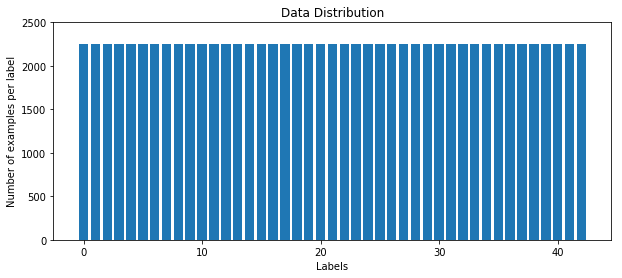

Number of balanced training examples = 96750
Image data shape                     = (96750, 32, 32)
Single image data shape              = (32, 32)


In [8]:
print('\nDistribution of the balanced training data:\n')
data_distribution(y_train_balanced)

print("Number of balanced training examples =", len(y_train_balanced))
print("Image data shape                     =", X_train_balanced.shape)
print("Single image data shape              =", X_train_balanced[1].shape)

In [9]:
from sklearn.utils import shuffle

print(X_train.shape, y_train.shape)
print(X_train_balanced.dtype, X_train.dtype)

(39209, 32, 32, 3) (39209,)
int64 uint8


In [10]:
shape = X_train_gray.shape + (1,)
print(shape)
X_train_gray = X_train_gray.reshape(shape)
print(X_train_gray.shape)

(39209, 32, 32, 1)
(39209, 32, 32, 1)


In [11]:
# Normalization (range [0.1, 0.9])

def normalize(X, a=0.1, b=0.9):
    """
    Normalize the image data with Min-Max scaling to a range of [a, b]
    :param X: image data to be normalized
    :return: normalized image data
    """
    grayscale_min = 0
    grayscale_max = 255
    return a + ( ( (X - grayscale_min)*(b - a) )/( grayscale_max - grayscale_min ) )

X_train_bn = normalize(X_train_balanced)
X_test = normalize(X_test_gray)

In [12]:
# Reshape and Splitting

from sklearn.model_selection import train_test_split

shape1 = X_train_bn.shape + (1,)
X_train_bn = X_train_bn.reshape(shape1)
shape2 = X_test.shape + (1,)
X_test = X_test.reshape(shape2)

X_train, X_validation, y_train, y_validation = train_test_split(X_train_bn, y_train_balanced, 
                                                                test_size=0.2, random_state=123)

print("Number of training examples   =", len(X_train))
print("Number of validation examples =", len(X_validation))
print("Number of testing examples    =", len(X_test))
print("Single image data shape       =", X_train[0].shape)
print("Number of classes             =", n_classes)

Number of training examples   = 77400
Number of validation examples = 19350
Number of testing examples    = 12630
Single image data shape       = (32, 32, 1)
Number of classes             = 43


**The model will be built and trained based on the obtained data here:** 

- X_train,      y_train
- X_validation, y_validation

**The final model will be tested on the grayscaled and normalized test data:**

- X_test,       y_test

According to rule of 30, the trustable accuracy increase is 
$$\frac{30}{\text{number of validation examples}} = \frac{30}{19350} =0.00155.$$

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

### 2.1 Model Architecture

In [13]:
import tensorflow as tf
from tensorflow.contrib.layers import flatten

EPOCHS = 60
# Batch size is chose so that it is slightly bigger than n_classes * 10
BATCH_SIZE = 512
keep_prob = tf.placeholder(tf.float32)

def Inception_revised(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    #SOLUTION: Layer 0: 
    #part 1. Convolutional. Input = 32x32x1. Output = 32x32x4.
    conv0_W = tf.Variable(tf.truncated_normal(shape=(1,1,1,4), mean=mu, stddev=sigma))
    conv0_b = tf.Variable(tf.zeros(4))
    conv0   = tf.nn.conv2d(x, conv0_W, strides=[1,1,1,1], padding='SAME') + conv0_b
    conv0   = tf.nn.relu(conv0)
    
    #Layer 0, part 2. Convolutional. Input = conv0: 32x32x4. Output = 32x32x32.
    conv01_W = tf.Variable(tf.truncated_normal(shape=(3,3,4,32), mean=mu, stddev=sigma))
    conv01_b = tf.Variable(tf.zeros(32))
    conv01   = tf.nn.conv2d(conv0, conv01_W, strides=[1,1,1,1], padding='SAME') + conv01_b
    conv01   = tf.nn.relu(conv01)
    
    #Layer0, part 3. Convolutional. Input = conv0: 32x32x4. Output = 32x32x32.
    conv02_W = tf.Variable(tf.truncated_normal(shape=(5,5,4,32), mean=mu, stddev=sigma))
    conv02_b = tf.Variable(tf.zeros(32))
    conv02   = tf.nn.conv2d(conv0, conv02_W, strides=[1,1,1,1], padding='SAME') + conv02_b
    conv02   = tf.nn.relu(conv02)
    
    #Layer0, part 4.1. Max-Pooling. Input = x: 32x32x1. Output = 32x32x1.
    conv03   = tf.nn.max_pool(x, ksize=[1,3,3,1], strides=[1,1,1,1], padding='SAME')
    #Layer0, part 4.2. Convolutional. Input = conv03: 32x32x1. Output = 32x32x4.
    conv03_W = tf.Variable(tf.truncated_normal(shape=(1,1,1,4), mean=mu, stddev=sigma))
    conv03_b = tf.Variable(tf.zeros(4))
    conv03   = tf.nn.conv2d(conv03, conv03_W, strides=[1,1,1,1], padding='SAME') + conv03_b
    conv03   = tf.nn.relu(conv03)
    
    #Layer0 concat layer. Output = 32x32x72
    conv0 = tf.concat_v2([conv0, conv01, conv02, conv03],3)
    
    #Add dropout 
    conv0 = tf.nn.dropout(conv0, keep_prob=keep_prob)   
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x72. Output = 28x28x128.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 72, 128), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(128))
    conv1   = tf.nn.conv2d(conv0, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)
    
    # SOLUTION: Pooling. Input = 28x28x128. Output = 14x14x128.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # Add dropout
    conv1 = tf.nn.dropout(conv1, keep_prob=keep_prob)
    
    # SOLUTION: Layer 2: Convolutional. Input = 14x14x128. Output = 10x10x256.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 128, 256), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(256))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x256. Output = 5x5x256.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x256. Output = 6400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Global Idea Layer. 
    # Step 1. Convolutional. Input = x: 32x32x1. Output = 32x32x4
    conv_gW = tf.Variable(tf.truncated_normal(shape=(1,1,1,4), mean=mu, stddev=sigma))
    conv_gb = tf.Variable(tf.zeros(4))
    conv_g   = tf.nn.conv2d(x, conv_gW, strides=[1,1,1,1], padding='SAME') + conv_gb
    conv_g   = tf.nn.relu(conv_g)
    # Global Layer Step 2. flatten. Input = 32x32x4. Output = 4096
    g0 = flatten(conv_g)
    # Add Dropout
    g0 = tf.nn.dropout(g0, keep_prob=keep_prob)
    # Global Layer Step 3. Input = g0: 4096. Output = 512.
    gl_W = tf.Variable(tf.truncated_normal(shape=(4096,512), mean=mu, stddev=sigma))
    gl_b = tf.Variable(tf.zeros(512))
    gl = tf.matmul(g0, gl_W) + gl_b
    gl = tf.nn.relu(gl)

    #Concat layer. Output = 6400+512=6912
    fc0 = tf.concat_v2([fc0, gl],1)
    
    #Add Dropout
    fc0 = tf.nn.dropout(fc0, keep_prob=keep_prob)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 6912. Output = 512.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(6912, 512), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(512))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
    
    ## Add Dropout 
    fc1 = tf.nn.dropout(fc1, keep_prob=keep_prob)

    # SOLUTION: Layer 4: Fully Connected. Input = 512. Output = 128.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(512, 128), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(128))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    
    # Add Dropout
    fc2 = tf.nn.dropout(fc2, keep_prob=keep_prob)

    # SOLUTION: Layer 5: Fully Connected. Input = 128. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(128, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

### 2.2 Features and Labels

In [14]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

### 2.3 Training Pipeline

In [15]:
rate = tf.Variable(0.001)

logits = Inception_revised(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

### 2.4 Model Evaluation

In [16]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### 2.4 Train the Model

In [17]:
## Train the model
from sklearn.utils import shuffle

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        if 10 < i < 30:
            rate = 0.0005
        if i > 30:
            rate = 0.0002
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.4f}".format(validation_accuracy))
        print()
        
    saver.save(sess, 'Inception_revised')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.0374

EPOCH 2 ...
Validation Accuracy = 0.1690

EPOCH 3 ...
Validation Accuracy = 0.5150

EPOCH 4 ...
Validation Accuracy = 0.7753

EPOCH 5 ...
Validation Accuracy = 0.8952

EPOCH 6 ...
Validation Accuracy = 0.9432

EPOCH 7 ...
Validation Accuracy = 0.9694

EPOCH 8 ...
Validation Accuracy = 0.9796

EPOCH 9 ...
Validation Accuracy = 0.9856

EPOCH 10 ...
Validation Accuracy = 0.9885

EPOCH 11 ...
Validation Accuracy = 0.9910

EPOCH 12 ...
Validation Accuracy = 0.9937

EPOCH 13 ...
Validation Accuracy = 0.9944

EPOCH 14 ...
Validation Accuracy = 0.9950

EPOCH 15 ...
Validation Accuracy = 0.9958

EPOCH 16 ...
Validation Accuracy = 0.9969

EPOCH 17 ...
Validation Accuracy = 0.9973

EPOCH 18 ...
Validation Accuracy = 0.9970

EPOCH 19 ...
Validation Accuracy = 0.9969

EPOCH 20 ...
Validation Accuracy = 0.9977

EPOCH 21 ...
Validation Accuracy = 0.9981

EPOCH 22 ...
Validation Accuracy = 0.9979

EPOCH 23 ...
Validation Accuracy = 0.9986

EPOCH 2

In [18]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    test_accuracy = evaluate(X_test, y_test)
    print('Test Accuracy = {:.3f}'.format(test_accuracy))

Test Accuracy = 0.979


### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

- In the step of data visualization, we observed that a graysclae traffic sign still convey enough information to make classifications. Therefore, we decided to convert all images to grayscale in order to reduce the amount of future computational work.

- Since the training data is unbalanced, it will affect the accuracy of any model. Hence, data balancing skills such as Gaussian bluring, adding noise to boundaries, random rotation, enhancing contrast and random scaling etc. are used to augment the training data. 

The idea is to introduce noises to exist data. Meanwhile, guarantee that the produced images still convey sufficient information. We only add noise to boundaries, aiming to force the model to focus on the middle part of images. We use random but small rotations aiming to mimic tilt of a traffic sign. We use gaussian bluring, aiming to increase the difficulty of information abstraction in training process. On the other side, we wish it will increase the model's accuracy by taking this measurement.

- Normalization is used in data preprocessing. The range of data has been transformed to [0.1, 0.9]. It aims to improve the computational efficiency.

- As a final step, we make a splitting for the obtained training data. Namely, the above obtained training data was splitted further into a new training data set and a validation data set. The future models will be built and trained on these two sets. 

- For the test set, it is also first converted to grayscale and then normalized.


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

The number of original training examples is 39209. After the data balancing step, the number goes up to 96750. Then the balanced training data was splitted to new training data and validation data at the ratio of 4:1. Namely, after the splitting, the number of training exaples is 77400 and the number of validation examples is 19350.

The testing data was grayscaled and normalized to a new test data. 

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

The final model was a modified inception module. Several layers aiming to grasp the global features are added into the regular inception module. 

       L0/L0: 32x32x1
       L0/L1_1: 32x32x4(1x1 conv)         L0/L1_2: 32x32x1(max-pooling)      L0/G0: 32x32x4 (1x1 conv)
       L1_1/L1_1_1: 32x32x32(3x3 conv)    L1_1/L1_1_2: 32x32x32(5x5 conv)    L1_2/L1_2_1: 32x32x4(1x1 conv)    
       L0 = concat([L1_1, L1_1_1, L1_1_2, L1_2_1]): 32x32x72
       Dropout
       L0/L1: 28x28x128(5x5 conv)
       L1/L1: 14x14x128(max-pooling)
       Dropout
       L1/L2: 10x10x256(5x5 conv)
       L2/L2: 5x5x256(max-pooling)
       L2/L2: 6400(flatten)
       
       Global Layer: start from G0
       G0/G1: 4096(flatten)
       G1/G2: 512(full connected)
       
       L3 = concat([L2, G2]): 6912
       Dropout
       L3/L4: 512(full connected)
       Dropout
       L4/L5: 128
       Dropout
       L5/logits: 43

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

- Type of optimizer: AdamOptimizer

- Batch size: 512 

The batch size was decided by the number of classes. Recall the idea of minibatch is to lower down the burden of RAM and computation. But it should also take care of good convergency. I think the size of a batch should be bigger than constant_number * number_of_classes. 

- Epochs: depend on the performance of training process. 

- Keep probability (dropout layer): 0.5

It should be decided by the amount of parameters of the former layer.

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

Since I've explaine how I preprocessed the data on above, let's focus on models here.

The first model was based on LeNet, who played a fundamental role in deep learning just like in a general modeling work we always start with linear models. We changed its batch size, the number of epochs and adjusted the input-output shapes. During the whole process, the rule-first overfitting then tunning- was followed. For example, in the base layer, we tried to extract as many features as we can. So we adjusted the shapes to (input 32x32x1 output 28x28x60). The test accuracy was **0.967**. 

When we went to the details of LeNet's architecture, we were always facing choices at almost each layer that should we use a pooling operation or have a convolution. Moreover, we need to decide is it 3 by 3 or 5 by 5 since all of these are beneficial to modeling power of the network. In this point we agreed with inception model. And the effect is quite good. With EPOCHS=30, BATCH_SIZE=512, keep_prob=0.5, he test accuracy went to **0.981**.

As I understand, CNNs is designed by mainly observing that neighbors are closely related in an example. Sharing weights can bring us shift invariancy and also make parameters less. The global frame features is ignored to some extend. If we can add one to two layers to grasp the global features, it would make the model works better. Based on these analysis, started from original input image data (32x32x1) I insert a full connected layer and add its result to the first full connected layer (fc0) of the last model. With few adjustment on the input-output shapes, the test accuracy goes to **0.983**. It is an statistically trustable improvement compare to our last result according to the rule of 30. Another thing which is worth to mention as follows. On above model, the validation accuracies went on increasing until epoch 17. Then I saw a little bit shock. However, for this model, the validation accuracies increase all the way until epoch 38. I leave analysis to my further work. 

In the 4th model, I try to load more nonlinearity to the layers where they graps global features. Concretely, a 1x1 convolutional layer is inserted to the beginning. Then several parameters are adjusted. For example, the epochs is increased to 60. The rate is also reset according to former experience. The test accuracy drops to **0.979**, which is disappointed.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

Completed! The shape is: (5, 32, 32)


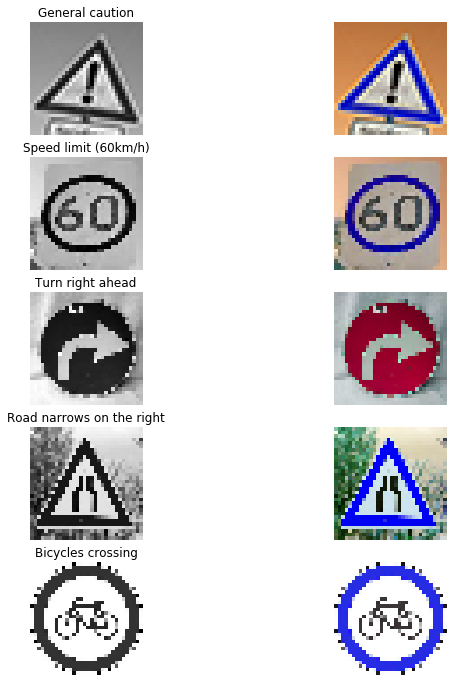

In [38]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

import os
import numpy as np
import matplotlib.pyplot as plt
import cv2

new_images_dir = './new_test_images/'

# read and resize images
def read_and_resize(images_dir):
    """
    Given images directory, read and resize the images. Output a ndarray data
    """
    output_gray, output_original = [], []
    for file_name in os.listdir(images_dir):
        #read
        image = cv2.imread(images_dir+file_name)
        #resize
        image = cv2.resize(image, (32,32))
        #grayscale
        image_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
        #normalize to [0.1,0.9]
        image_gray = 0.1 + image_gray*0.8/255
        output_gray.append(image_gray)
        output_original.append(image)
    output_gray, output_original = np.array(output_gray), np.array(output_original)
    print('Completed! The shape is:', output_gray.shape)
    return output_gray, output_original

new_test_images, original = read_and_resize(new_images_dir)
image_names = ['General caution', 'Speed limit (60km/h)', 'Turn right ahead', 
               'Road narrows on the right', 'Bicycles crossing']

# plot new test examples
plt.figure(figsize=(10,12))
for i in range(5):
    plt.subplot(5, 2, 2*i+1)
    plt.imshow(new_test_images[i], cmap='gray')
    plt.axis('off')
    plt.title(image_names[i])
    plt.subplot(5, 2, 2*i+2)
    plt.imshow(original[i])
    plt.axis('off')
plt.show()


### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

Description of new test images.

1. General caution. 

2. Speed limits (60km/h). The image is slightly distorted.

3. Turn right ahead. Loaded a little bit noise.

4. Road narrows on the right. It is acutally narrows on the right and on the left.

5. Bicycles crossing. In the training and testing data sets, the bicycle is surrounded by a triangle, while here it is surrounded by a cycle. This will cause problems.

In [39]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

# Test Model
k = 5
print(new_test_images.shape)
shape = new_test_images.shape + (1,)
print(shape)
new_test_images1 = new_test_images.reshape(shape)
print(new_test_images1.shape)
with tf.Session() as sess:   
    new_saver = tf.train.import_meta_graph('Inception_revised.meta')
    new_saver.restore(sess, tf.train.latest_checkpoint('./'))

    test_prob = sess.run(tf.nn.top_k(tf.nn.softmax(logits), k=k), feed_dict={x: new_test_images1, keep_prob: 1})

(5, 32, 32)
(5, 32, 32, 1)
(5, 32, 32, 1)


/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


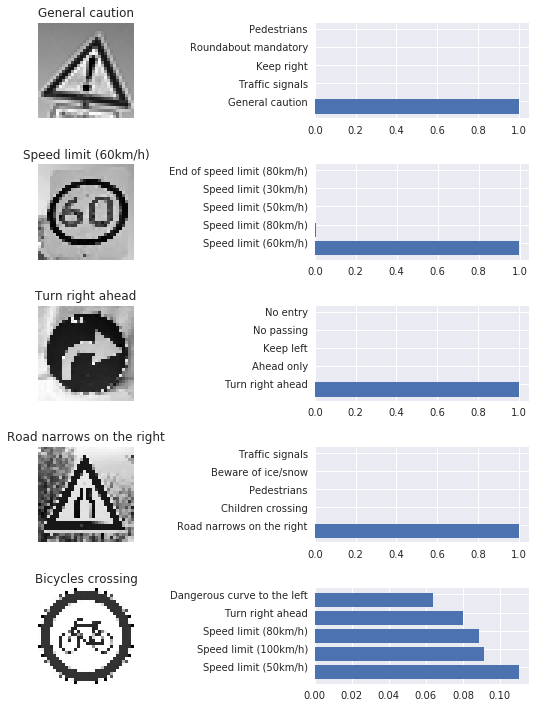

In [51]:
import seaborn as sns

plt.rcParams['figure.figsize'] = (8.0, 10.0)
#image_indices = np.arange(0, len(images_resized))
for i in range(k):
    with sns.axes_style("white"):
        plt.subplot(k, 2, 2*i+1)
    plt.imshow(np.squeeze(new_test_images[i]), cmap='gray')
    plt.axis('off')
    plt.title(image_names[i])
    plt.subplot(k ,2, 2*i+2)
    plt.barh(np.arange(k), test_prob.values[i])
    plt.yticks(np.arange(k)+0.3, signNames[test_prob.indices[i],1])
    plt.tight_layout()

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

The outputs of supervised machine learning always depend on the completeness of its training data. More complete for the model, more accurate for its prediction. If the data contains almost all possible situation, the prediction is reasonably high. Otherwise, it performs bad. For the first 3 examples, the model suggested correct answers. For the 4th one, it offers the most closest classification. Based on the present model it is hard to find out the correct answer for the 5th example.

The idea model for detecting the traffic signs should first find out the regular frames, such as cycle, triangel, diamond etc, then goes to inside of the frame and detect its content.

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

Please refer to above result.

## Appendix: Model One to Model Three

### 3.1 Model One

...

EPOCH 50 ...
Validation Accuracy = 0.9988

Model saved

Test Accuracy = 0.967

In [ ]:
EPOCHS = 50
# Batch size is chose so that it is slightly bigger than n_classes * 10
BATCH_SIZE = 512
keep_prob = tf.placeholder(tf.float32)

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x60.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 60), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(60))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x60. Output = 14x14x60.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Input = 14x14x60. Output = 10x10x120.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 60, 120), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(120))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x120. Output = 5x5x120.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x120. Output = 3000.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 3000. Output = 400.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(3000, 400), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(400))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
    
    ## Add Dropout 
    fc1 = tf.nn.dropout(fc1, keep_prob=keep_prob)

    # SOLUTION: Layer 4: Fully Connected. Input = 400. Output = 100.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(400, 100), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(100))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    
    # Add Dropout
    fc2 = tf.nn.dropout(fc2, keep_prob=keep_prob)

    # SOLUTION: Layer 5: Fully Connected. Input = 100. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(100, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

## Features and Labels
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

## Training Pipeline

rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

## Model Evaluation

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### 3.2 Model Two

...

EPOCH 30 ...

Validation Accuracy = 0.9992

Model saved

Test Accuracy = 0.981

In [ ]:
EPOCHS = 30
# Batch size is chose so that it is slightly bigger than n_classes * 10
BATCH_SIZE = 512
keep_prob = tf.placeholder(tf.float32)

def Inception_v1(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    #SOLUTION: Layer 0: 
    #part 1. Convolutional. Input = 32x32x1. Output = 32x32x3.
    conv0_W = tf.Variable(tf.truncated_normal(shape=(1,1,1,3), mean=mu, stddev=sigma))
    conv0_b = tf.Variable(tf.zeros(3))
    conv0   = tf.nn.conv2d(x, conv0_W, strides=[1,1,1,1], padding='SAME') + conv0_b
    conv0   = tf.nn.relu(conv0)
    
    #Layer 0, part 2. Convolutional. Input = conv0: 32x32x3. Output = 32x32x32.
    conv01_W = tf.Variable(tf.truncated_normal(shape=(3,3,3,32), mean=mu, stddev=sigma))
    conv01_b = tf.Variable(tf.zeros(32))
    conv01   = tf.nn.conv2d(conv0, conv01_W, strides=[1,1,1,1], padding='SAME') + conv01_b
    conv01   = tf.nn.relu(conv01)
    
    #Layer0, part 3. Convolutional. Input = conv0: 32x32x3. Output = 32x32x32.
    conv02_W = tf.Variable(tf.truncated_normal(shape=(5,5,3,32), mean=mu, stddev=sigma))
    conv02_b = tf.Variable(tf.zeros(32))
    conv02   = tf.nn.conv2d(conv0, conv02_W, strides=[1,1,1,1], padding='SAME') + conv02_b
    conv02   = tf.nn.relu(conv02)
    
    #Layer0, part 4.1. Max-Pooling. Input = x: 32x32x1. Output = 32x32x1.
    conv03   = tf.nn.max_pool(x, ksize=[1,3,3,1], strides=[1,1,1,1], padding='SAME')
    #Layer0, part 4.2. Convolutional. Input = conv03: 32x32x1. Output = 32x32x3.
    conv03_W = tf.Variable(tf.truncated_normal(shape=(1,1,1,3), mean=mu, stddev=sigma))
    conv03_b = tf.Variable(tf.zeros(3))
    conv03   = tf.nn.conv2d(conv03, conv03_W, strides=[1,1,1,1], padding='SAME') + conv03_b
    conv03   = tf.nn.relu(conv03)
    
    #Layer0 concate layer
    conv0 = tf.concat_v2([conv0, conv01, conv02, conv03],3)
    
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x70. Output = 28x28x128.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 70, 128), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(128))
    conv1   = tf.nn.conv2d(conv0, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x128. Output = 14x14x128.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Input = 14x14x128. Output = 10x10x256.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 128, 256), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(256))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x256. Output = 5x5x256.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x256. Output = 6400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 6400. Output = 800.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(6400, 800), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(800))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
    
    ## Add Dropout 
    fc1 = tf.nn.dropout(fc1, keep_prob=keep_prob)

    # SOLUTION: Layer 4: Fully Connected. Input = 800. Output = 120.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(800, 120), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(120))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    
    # Add Dropout
    fc2 = tf.nn.dropout(fc2, keep_prob=keep_prob)

    # SOLUTION: Layer 5: Fully Connected. Input = 120. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(120, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

### 3.3 Model Three

...

EPOCH 50 ...
Validation Accuracy = 0.9991

Model saved

Test Accuracy = 0.983

In [ ]:
EPOCHS = 50
# Batch size is chose so that it is slightly bigger than n_classes * 10
BATCH_SIZE = 512
keep_prob = tf.placeholder(tf.float32)

def Inception_v2(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    #SOLUTION: Layer 0: 
    #part 1. Convolutional. Input = 32x32x1. Output = 32x32x4.
    conv0_W = tf.Variable(tf.truncated_normal(shape=(1,1,1,4), mean=mu, stddev=sigma))
    conv0_b = tf.Variable(tf.zeros(4))
    conv0   = tf.nn.conv2d(x, conv0_W, strides=[1,1,1,1], padding='SAME') + conv0_b
    conv0   = tf.nn.relu(conv0)
    
    #Layer 0, part 2. Convolutional. Input = conv0: 32x32x4. Output = 32x32x32.
    conv01_W = tf.Variable(tf.truncated_normal(shape=(3,3,4,32), mean=mu, stddev=sigma))
    conv01_b = tf.Variable(tf.zeros(32))
    conv01   = tf.nn.conv2d(conv0, conv01_W, strides=[1,1,1,1], padding='SAME') + conv01_b
    conv01   = tf.nn.relu(conv01)
    
    #Layer0, part 3. Convolutional. Input = conv0: 32x32x4. Output = 32x32x32.
    conv02_W = tf.Variable(tf.truncated_normal(shape=(5,5,4,32), mean=mu, stddev=sigma))
    conv02_b = tf.Variable(tf.zeros(32))
    conv02   = tf.nn.conv2d(conv0, conv02_W, strides=[1,1,1,1], padding='SAME') + conv02_b
    conv02   = tf.nn.relu(conv02)
    
    #Layer0, part 4.1. Max-Pooling. Input = x: 32x32x1. Output = 32x32x1.
    conv03   = tf.nn.max_pool(x, ksize=[1,3,3,1], strides=[1,1,1,1], padding='SAME')
    #Layer0, part 4.2. Convolutional. Input = conv03: 32x32x1. Output = 32x32x4.
    conv03_W = tf.Variable(tf.truncated_normal(shape=(1,1,1,4), mean=mu, stddev=sigma))
    conv03_b = tf.Variable(tf.zeros(4))
    conv03   = tf.nn.conv2d(conv03, conv03_W, strides=[1,1,1,1], padding='SAME') + conv03_b
    conv03   = tf.nn.relu(conv03)
    
    #Layer0 concat layer. Output = 32x32x72
    conv0 = tf.concat_v2([conv0, conv01, conv02, conv03],3)
    
    #Add dropout 
    conv0 = tf.nn.dropout(conv0, keep_prob=keep_prob)   
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x72. Output = 28x28x128.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 72, 128), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(128))
    conv1   = tf.nn.conv2d(conv0, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)
    
    # SOLUTION: Pooling. Input = 28x28x128. Output = 14x14x128.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # Add dropout
    conv1 = tf.nn.dropout(conv1, keep_prob=keep_prob)
    
    # SOLUTION: Layer 2: Convolutional. Input = 14x14x128. Output = 10x10x256.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 128, 256), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(256))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x256. Output = 5x5x256.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x256. Output = 6400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Globle Idea Layer. Input = x: 32x32x1. Output = 1024
    g0 = flatten(x)
    # Input = g0: 1024. Output = 256.
    gl_W = tf.Variable(tf.truncated_normal(shape=(1024,256), mean=mu, stddev=sigma))
    gl_b = tf.Variable(tf.zeros(256))
    gl = tf.matmul(g0, gl_W) + gl_b
    gl = tf.nn.relu(gl)

    #Concat layer. Output = 6400+256=6656
    fc0 = tf.concat_v2([fc0, gl],1)
    
    #Add Dropout
    fc0 = tf.nn.dropout(fc0, keep_prob=keep_prob)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 6656. Output = 512.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(6656, 512), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(512))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
    
    ## Add Dropout 
    fc1 = tf.nn.dropout(fc1, keep_prob=keep_prob)

    # SOLUTION: Layer 4: Fully Connected. Input = 512. Output = 128.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(512, 128), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(128))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    
    # Add Dropout
    fc2 = tf.nn.dropout(fc2, keep_prob=keep_prob)

    # SOLUTION: Layer 5: Fully Connected. Input = 128. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(128, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.